# Seattle House Data

## Abstract

This tutorial shows how to fit a regreesion model using Python code. After examining the data, the first part fits a model using the *sklearn* package. Then, we use the *keras* package to fit an artificial  neural network.


## Import and Describe the Data

We start by listing all of the packages needed for this tutorial. To show where they are required, we include them as comments.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import random

from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## The Data

These data come  from a [Kaggle competition](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

We start by reading in and checking the data.

In [2]:
#import pandas as pd
HouseData = pd.read_csv("https://raw.githubusercontent.com/OpenActTextDev/ActuarialRegression/refs/heads/main/CourseCSVData/kc_house_data.csv")
HouseData.head() # check the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let us look at the target (dependent) variable.

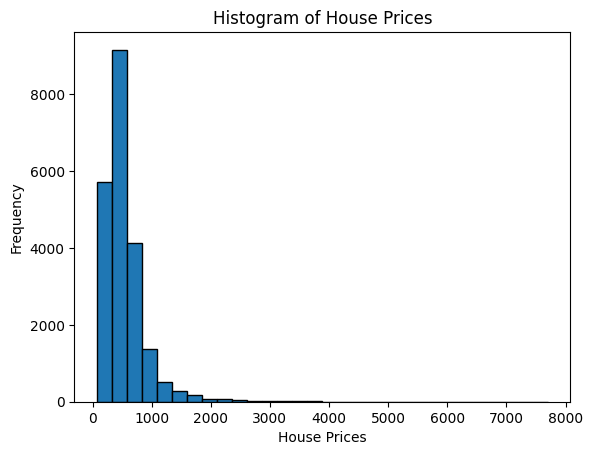

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64


In [3]:
# Define target, sales in thousands
y = HouseData['price']/1000

# Plot histogram
#import matplotlib.pyplot as plt
plt.hist(y, bins=30, edgecolor="black")
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.title("Histogram of House Prices")
plt.show()
print(y.describe())



Now, for the features (covariates).

In [4]:
# Define features (drop target + non-predictors like id, date)
X = HouseData.drop(columns=['price', 'id', 'date'])
print(X.describe())


           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.007542      0.234303      3.409430      7.656873   1788.390691   
std        0.086517      0.766318      0.650743    

We might be interested in geo-spatial features of the data.

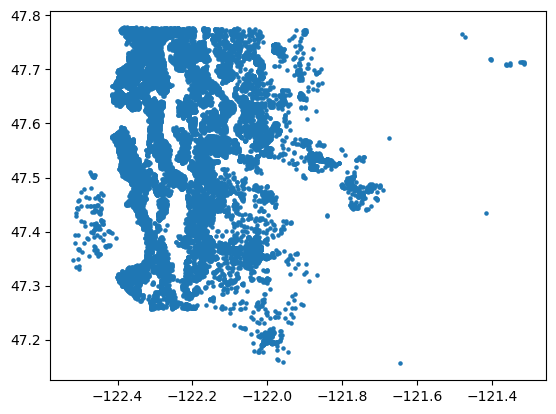

In [5]:
plt.scatter(X["long"], X["lat"], s=5);

Here is how one can split the data into training, validation, and testing sub-samples.

In [6]:
#from sklearn.model_selection import train_test_split
# Thanks https://datascience.stackexchange.com/a/15136
X_main, X_test, y_main, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# As 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(
    X_main, y_main, test_size=0.25, random_state=1
)


For presentation purposes, we use the simpler training and testing splits.

In [7]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16209, 18), (5404, 18), (16209,), (5404,))

# Regression Models

In [8]:
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# Create summary table
summary_df = pd.DataFrame({
    "Feature": ["Intercept"] + list(X.columns),
    "Coefficient": [model.intercept_] + list(model.coef_)
})

print(summary_df)

          Feature  Coefficient
0       Intercept  6690.324603
1        bedrooms   -35.766541
2       bathrooms    41.144279
3     sqft_living     0.110443
4        sqft_lot     0.000129
5          floors     6.689550
6      waterfront   582.960458
7            view    52.870942
8       condition    26.385649
9           grade    95.890445
10     sqft_above     0.070785
11  sqft_basement     0.039658
12       yr_built    -2.620223
13   yr_renovated     0.019813
14        zipcode    -0.582420
15            lat   602.748226
16           long  -214.729828
17  sqft_living15     0.021681
18     sqft_lot15    -0.000383


For consistency with other analyses, let us drop a few of the variables and show another way to fit the regression model.

In [9]:
#  A shorter version of the features matrix
XTrainShort = X_train.drop(columns=['zipcode','lat', 'long', 'sqft_living15',
                               'sqft_lot15', 'sqft_basement','view', 'condition','grade'])
XTrainShortInt = sm.add_constant(XTrainShort)  # adds intercept term

#import statsmodels.api as sm
#from sklearn.metrics import r2_score
model = sm.OLS(y_train, XTrainShortInt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     2517.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        16:35:53   Log-Likelihood:            -1.1133e+05
No. Observations:               16209   AIC:                         2.227e+05
Df Residuals:                   16199   BIC:                         2.228e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6235.6063    159.012     39.215   

Another way to do the regression.

In [10]:
lr = LinearRegression()
lr.fit(XTrainShortInt, y_train)
print(lr.coef_)

[ 0.00000000e+00 -6.02962627e+01  6.83540894e+01  2.76741207e-01
 -3.46251883e-04  4.64163644e+01  6.92124831e+02  1.68531128e-02
 -3.20304110e+00  1.31971195e-02]


Now, create a vectors of predictions; one for the training set, one for the test set. Then, compare the training set predictions to actual target outcomes.

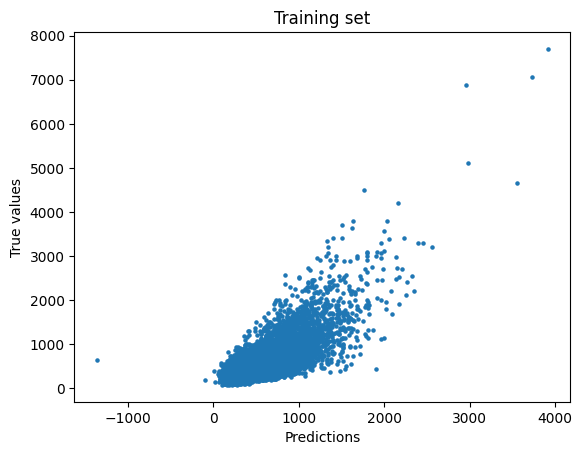

In [11]:
ytrain_predict = lr.predict(XTrainShortInt)
XTestShort = X_test.drop(columns=['zipcode','lat', 'long', 'sqft_living15',
                               'sqft_lot15', 'sqft_basement','view', 'condition','grade'])
XTestShortInt = sm.add_constant(XTestShort)  # adds intercept term
ytest_predict = lr.predict(XTestShortInt)

plt.scatter(ytrain_predict, y_train, s=5)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Training set");


Compare the test set predictions to actual target outcomes.

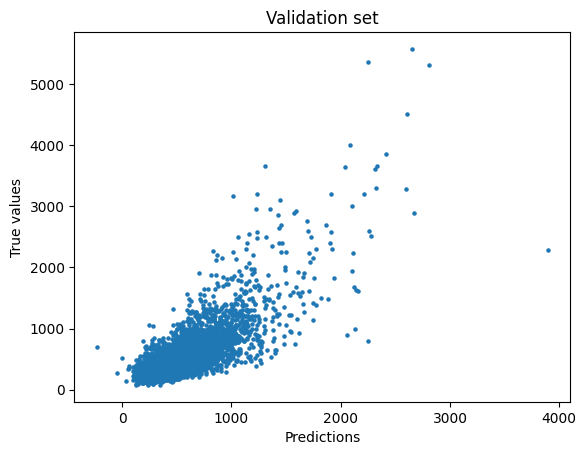

In [12]:
plt.scatter(ytest_predict, y_test, s=5)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Validation set");

Now let us compare predictions to actuals for both the training and test sets. Take the square root of the mse (mean squared error) so the units are in dollars (not squared dollars).

In [13]:
#from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(ytrain_predict, y_train)))
print(np.sqrt(mse(ytest_predict, y_test)))


232.65580118752024
246.84386800716536


As anticipated, the fit is better for the training than the test set.

#  Neural Nets

We can start by specifying the model and taking a look at a summary of it.

In [14]:
#from keras.models import Sequential
#from keras.layers import Dense, Input

model = Sequential(
    [Input((9,)),
     Dense(30, activation="leaky_relu"),
     Dense(1, activation="leaky_relu")]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# import random
random.seed(2025)
model = Sequential(
    [Dense(30, activation="leaky_relu"),
     Dense(1, activation="leaky_relu")]
);

In [16]:

model.compile("adam", "mse")
%time hist = model.fit(XTrainShort, y_train, epochs=5, validation_data=(XTestShort, y_test), verbose=True)

Epoch 1/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 284593.4062 - val_loss: 82606.2188
Epoch 2/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 88912.7422 - val_loss: 82039.3906
Epoch 3/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 75686.0156 - val_loss: 75987.5469
Epoch 4/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 85473.0391 - val_loss: 74621.5625
Epoch 5/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 70782.3906 - val_loss: 79807.9844
CPU times: user 9.73 s, sys: 718 ms, total: 10.4 s
Wall time: 15.4 s


In [17]:
print(np.sqrt(hist.history["loss"]))

[380.99706774 289.92383159 274.58332069 316.53525919 268.56045642]


In [18]:
model.compile("adam", "mse")
%time hist = model.fit(XTrainShort, y_train, epochs=150, validation_data=(XTestShort, y_test), verbose=False)
hist.history["loss"]

CPU times: user 3min 50s, sys: 16.5 s, total: 4min 6s
Wall time: 4min 45s


[74994.6015625,
 88495.3125,
 70686.6640625,
 65726.9453125,
 62722.0625,
 84372.3515625,
 76196.390625,
 64129.80859375,
 70476.4296875,
 76081.0625,
 66126.5703125,
 64963.46875,
 122260.625,
 59579.3671875,
 65752.90625,
 77196.0390625,
 61482.1015625,
 71643.6015625,
 60246.09375,
 73605.9765625,
 65864.0625,
 77857.2578125,
 78493.4453125,
 60862.67578125,
 84563.3203125,
 59690.73046875,
 71022.8671875,
 59936.26953125,
 63581.296875,
 60278.8671875,
 59855.625,
 85163.2578125,
 60027.03515625,
 68643.5625,
 61635.45703125,
 63893.3828125,
 61538.984375,
 83107.453125,
 60884.015625,
 59998.36328125,
 66720.6953125,
 85566.2734375,
 60423.46484375,
 66682.5703125,
 71071.2734375,
 62935.45703125,
 73845.828125,
 66522.984375,
 62543.80859375,
 110965.671875,
 61854.55078125,
 56366.76171875,
 57947.93359375,
 56280.9453125,
 69279.9375,
 91724.0390625,
 57566.6640625,
 62381.06640625,
 56518.84765625,
 130279.8984375,
 58048.109375,
 64787.01171875,
 57250.85546875,
 56997.792968

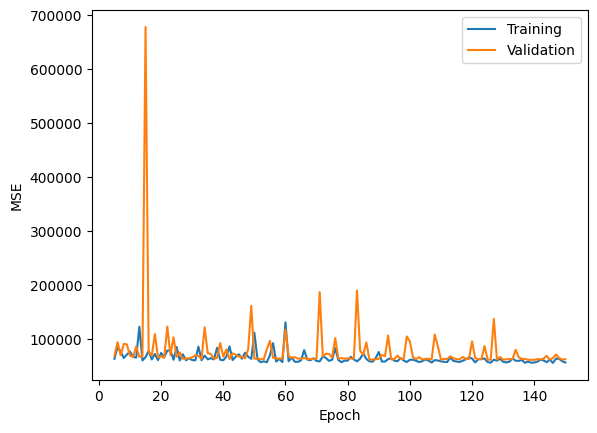

In [19]:
plt.plot(range(5, 151), hist.history["loss"][4:])
plt.plot(range(5, 151), hist.history["val_loss"][4:])

plt.legend(["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

In [20]:
yNNtrain_predict= model.predict(XTrainShort, verbose=0)
print(pd.DataFrame(yNNtrain_predict) .describe())


                  0
count  16209.000000
mean     529.601807
std      271.222748
min     -186.018173
25%      377.375153
50%      460.736603
75%      590.914490
max     6220.737793


In [21]:
#from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(yNNtrain_predict, y_train)))

232.02444873717099


In [22]:
yNNtest_predict= model.predict(XTestShort, verbose=0)

print(pd.DataFrame(yNNtest_predict) .describe())
print(np.sqrt(mse(yNNtest_predict, y_test)))


                 0
count  5404.000000
mean    536.469116
std     286.945892
min    -251.643661
25%     377.195908
50%     461.101562
75%     598.813705
max    3946.085205
248.86362010188708


**Rescale the features**

In [23]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(XTrainShort)

XTrainShort_sc = scaler.transform(XTrainShort)
XTestShort_sc  = scaler.transform(XTestShort)
print(pd.DataFrame(XTrainShort_sc) .describe())

                  0             1             2             3             4  \
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   1.876194e-16 -6.926137e-17  5.874065e-17  8.109717e-18 -1.806056e-16   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -3.608735e+00 -2.761375e+00 -1.966164e+00 -3.695520e-01 -9.186256e-01   
25%   -3.941321e-01 -8.011497e-01 -7.092478e-01 -2.540579e-01 -9.186256e-01   
50%   -3.941321e-01  1.789627e-01 -1.800198e-01 -1.872187e-01  2.158665e-03   
75%    6.774021e-01  5.056668e-01  5.256175e-01 -1.091237e-01  9.229429e-01   
max    3.175190e+01  7.693158e+00  1.099992e+01  2.961857e+01  3.685296e+00   

                  5             6             7             8  
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  
mean  -4.734321e-17  1.393995e-16  3.186023e-15  3.506905e-18  
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  
min   -8.378769e-02 -1.818889e+0

In [24]:
random.seed(2025)
model_sc = Sequential(
    [Dense(30, activation="leaky_relu"),
     Dense(1, activation="leaky_relu")]);


In [25]:

model_sc.compile("adam", "mse")
%time hist_sc = model_sc.fit(XTrainShort_sc, y_train, epochs=150, validation_data=(XTestShort_sc, y_test), verbose=False)
hist_sc.history["loss"]

CPU times: user 3min 53s, sys: 16.4 s, total: 4min 9s
Wall time: 4min 54s


[411052.0625,
 367404.34375,
 287050.0,
 203066.453125,
 138857.203125,
 99232.609375,
 78953.75,
 69510.296875,
 65043.42578125,
 62377.5703125,
 60327.80078125,
 58584.79296875,
 57093.81640625,
 55993.078125,
 55071.2734375,
 54365.26953125,
 53779.30859375,
 53314.39453125,
 52949.47265625,
 52630.79296875,
 52370.8125,
 52118.37890625,
 51932.6953125,
 51751.296875,
 51579.69140625,
 51404.08203125,
 51260.38671875,
 51105.83984375,
 50961.74609375,
 50840.17578125,
 50743.0703125,
 50602.69921875,
 50499.24609375,
 50416.03515625,
 50310.203125,
 50213.00390625,
 50136.1328125,
 50052.72265625,
 49961.3984375,
 49881.70703125,
 49774.1640625,
 49703.625,
 49635.16015625,
 49560.9921875,
 49498.30078125,
 49412.1328125,
 49360.3515625,
 49299.33984375,
 49216.796875,
 49172.56640625,
 49100.0078125,
 49051.92578125,
 49005.01953125,
 48950.24609375,
 48890.0859375,
 48839.0859375,
 48804.0,
 48749.98828125,
 48704.53515625,
 48667.94921875,
 48632.92578125,
 48580.21484375,
 48552

In [26]:
print(np.sqrt(hist_sc.history["loss"]))

[641.1334202  606.13888157 535.77047324 450.62895283 372.63548291
 315.01207814 280.98709935 263.64805494 255.03612642 249.7550206
 245.6171834  242.04295687 238.94312379 236.62856574 234.67269427
 233.16361108 231.90366231 230.89910033 230.10752412 229.41402086
 228.84670087 228.29450039 227.88746195 227.48911375 227.11162763
 226.72468333 226.40756772 226.06600771 225.74708435 225.47766138
 225.26222567 224.95043725 224.72037312 224.5351535  224.29936051
 224.08258278 223.91099306 223.72465813 223.52046537 223.34213
 223.10124173 222.94309812 222.78949741 222.62298216 222.48213587
 222.28840009 222.17189643 222.03454651 221.84858998 221.74888141
 221.58521569 221.47669354 221.37077389 221.24702505 221.11102627
 220.9956695  220.91627373 220.79399512 220.69104005 220.60813498
 220.52874139 220.40919864 220.34711607 220.23201544 220.14329495
 220.04829015 219.97756455 219.87768262 219.80496504 219.73329004
 219.62076689 219.57617201 219.48239003 219.41213183 219.32726511
 219.26729015 

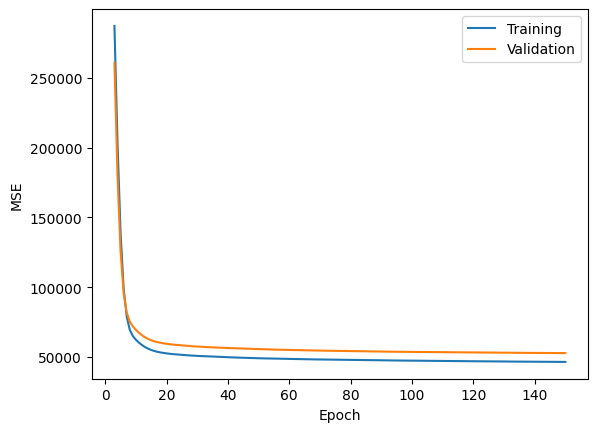

In [27]:
plt.plot(range(3, 151), hist_sc.history["loss"][2:])
plt.plot(range(3, 151), hist_sc.history["val_loss"][2:])

plt.legend(["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

In [28]:
ysctrain_predict= model_sc.predict(XTrainShort_sc, verbose=0)
ysctest_predict = model_sc.predict(XTestShort_sc, verbose=0)

print(np.sqrt(mse(ysctrain_predict, y_train)))
print(np.sqrt(mse(ysctest_predict, y_test)))

215.5567608583152
229.86743447261296
